# Import Libraries
This section imports all necessary Python libraries for data processing, modeling, and visualization.

In [1]:
import pandas as pd
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from scipy.spatial import distance
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap

# Load Preprocessed Data & Z-Score Normalization (Before-After Table)

In [2]:
# Load original dataset to show before-after normalization
wine = pd.read_csv('winequality-red.csv')
X_original = wine.drop('quality', axis=1)

# Simulate Z-score normalization
sc = StandardScaler()
X_scaled = sc.fit_transform(X_original)
X_scaled_df = pd.DataFrame(X_scaled, columns=X_original.columns)

# Display first 5 rows before normalization
print("📋 Before Z-Score Normalization:")
display(X_original.head())

# Display first 5 rows after normalization
print("\n📋 After Z-Score Normalization:")
display(X_scaled_df.head())

📋 Before Z-Score Normalization:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4



📋 After Z-Score Normalization:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246


# Train KNN Classifier with Euclidean Distance Calculation

In [3]:
# Load preprocessed and scaled data from .pkl files
X_train = joblib.load('X_train.pkl')
X_test = joblib.load('X_test.pkl')
y_train = joblib.load('y_train.pkl')
y_test = joblib.load('y_test.pkl')

# Example: Train KNN with k=1
knn = KNeighborsClassifier(n_neighbors=1, metric='euclidean')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Show manual Euclidean distance for first test sample
print("🔢 Manual Euclidean Distance Calculation (first test sample):")
dists = [np.sqrt(np.sum((x - X_test[0]) ** 2)) for x in X_train]
nearest_index = np.argmin(dists)
print(f"Closest training sample index: {nearest_index}, Label: {y_train.iloc[nearest_index]}")


🔢 Manual Euclidean Distance Calculation (first test sample):
Closest training sample index: 750, Label: 0


# Experiment with Different K Values

K = 1 → Accuracy = 0.8906
K = 3 → Accuracy = 0.8719
K = 5 → Accuracy = 0.8812
K = 7 → Accuracy = 0.8875
K = 9 → Accuracy = 0.8812


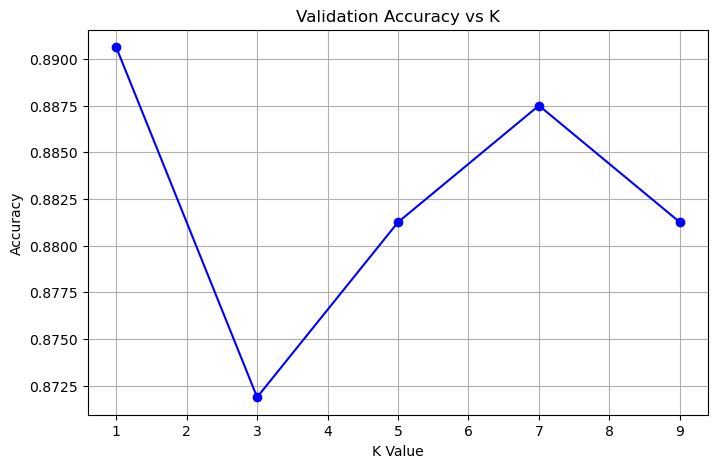


✅ Best K = 1 with Accuracy = 89.06%


In [4]:
# Try multiple k values
k_values = [1, 3, 5, 7, 9]
val_scores = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    val_scores.append(acc)
    print(f"K = {k} → Accuracy = {acc:.4f}")

# Plot validation accuracy per k
plt.figure(figsize=(8,5))
plt.plot(k_values, val_scores, marker='o', color='blue')
plt.title("Validation Accuracy vs K")
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

# Find best K
best_k = k_values[np.argmax(val_scores)]
print(f"\n✅ Best K = {best_k} with Accuracy = {max(val_scores)*100:.2f}%")


# Final Evaluation with Confusion Matrix

In [5]:
# Train final KNN model using best K
final_knn = KNeighborsClassifier(n_neighbors=best_k, metric='euclidean')
final_knn.fit(X_train, y_train)
y_pred = final_knn.predict(X_test)

# Evaluation results
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       273
           1       0.63      0.62      0.62        47

    accuracy                           0.89       320
   macro avg       0.78      0.78      0.78       320
weighted avg       0.89      0.89      0.89       320

=== Confusion Matrix ===
[[256  17]
 [ 18  29]]


# Visualize Decision Boundaries (2D PCA Projection)

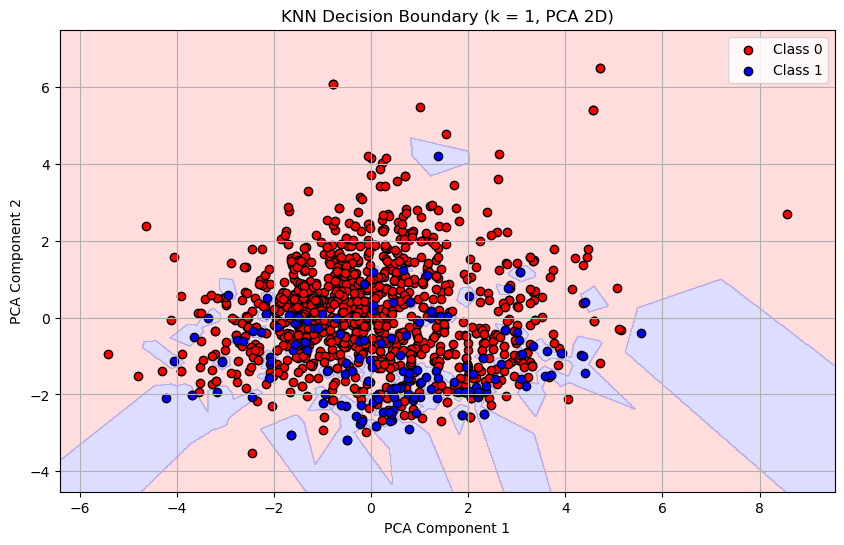

In [6]:
# Reduce to 2D using PCA
pca = PCA(n_components=2)
X_train_2D = pca.fit_transform(X_train)
X_test_2D = pca.transform(X_test)

# Train KNN with best_k
best_k = 1  # or replace with your chosen best K
knn_2D = KNeighborsClassifier(n_neighbors=best_k, metric='euclidean')
knn_2D.fit(X_train_2D, y_train)

# Create mesh grid
h = 0.02
x_min, x_max = X_train_2D[:, 0].min() - 1, X_train_2D[:, 0].max() + 1
y_min, y_max = X_train_2D[:, 1].min() - 1, X_train_2D[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict class for each point in the grid
Z = knn_2D.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(10, 6))
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_bold = ['red', 'blue']

plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.4)

# Plot training points
for idx, cls in enumerate(np.unique(y_train)):
    plt.scatter(X_train_2D[y_train == cls, 0],
                X_train_2D[y_train == cls, 1],
                c=cmap_bold[idx],
                label=f'Class {cls}',
                edgecolor='k')

plt.title(f"KNN Decision Boundary (k = {best_k}, PCA 2D)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)
plt.show()